In [40]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [41]:
url = 'https://www.jumia.co.ke/mlp-top-sellers/'
response = requests.get(url)
soup = BeautifulSoup(response.text,'html.parser')

In [44]:
#lets create an empyty list that will store the products
all_products = []
#we'll iterate the 50 pages of the website
for page in range(1, 50):
     next_url = f"{url}?page={page}"
     response = requests.get(next_url)
     soup = BeautifulSoup(response.text, 'html.parser')
     product_details = soup.find_all('div', class_ = 'info')
     for product_detail in product_details:
        try:
            Name = product_detail.find('h3', class_='name').text.strip()
        except:
            Name = " "
        try:
            Current_price = product_detail.find('div', class_='prc').text.strip()
        except:
            Current_price = " "
        try:
            Initial_price = product_detail.find('div', class_='old').text.strip()
        except:
            Initial_price = " "
        try:
            Discount = product_detail.find('div', class_='bdg _dsct _sm').text.strip()
        except:
            Discount = " "
        try:
            Items_remaining= product_detail.find('div', class_='rev').text.strip()
        except:
            year = " "
        try:
            Stars = product_detail.find('div', class_='stars _s').text.strip()
        except:
            Stars = " "

        product_dict = {'Name':Name,
                    'Current_price': Current_price,
                    'Initial_price': Initial_price,
                    'Discount': Discount,
                    'Items_remaining': Items_remaining,
                    'Stars': Stars}
        all_products.append(product_dict)

product_df3 = pd.DataFrame(all_products)
product_df3

,Name,Current_price,Initial_price,Discount,Items_remaining,Stars
0,NIVEA UV Face Shine Control Cream SPF 50 - 50ml,KSh 699,"KSh 1,300",46%,4.3 out of 5(5186),4.3 out of 5
1,NIVEA Nourishing Cocoa Body Lotion With Cocoa ...,KSh 699,"KSh 1,280",45%,4.6 out of 5(1556),4.6 out of 5
2,Fashion 6Pcs Soft Cotton Checked Men's Boxers ...,KSh 501,KSh 618,19%,3.6 out of 5(2920),3.6 out of 5
3,"Vitron HTC4388FS - 43"" Smart Android Frameles...","KSh 18,999","KSh 28,599",34%,3.9 out of 5(1767),3.9 out of 5
4,Garnier Vitamin C Booster Serum 30ml Twin Pack,"KSh 1,750","KSh 3,500",50%,4.5 out of 5(787),4.5 out of 5
...,...,...,...,...,...,...
1955,Hifinit Movie LED TV 1080P 6000 Lumen MINI Pro...,"KSh 10,147","KSh 19,555",48%,4.8 out of 5(5),4.8 out of 5
1956,All In 1 Vegetable Safe Mandoline Slicer Cutte...,"KSh 1,424","KSh 2,500",43%,4.8 out of 5(5),
1957,Tanqueray Rangpur Distilled Gin - 700ml,"KSh 2,599","KSh 3,000",13%,5 out of 5(10),5 out of 5
1958,Vacuum Red Wine Bottle Cap Stopper Silicone Se...,KSh 499,KSh 800,38%,5 out of 5(10),


In [45]:
product_df3.to_csv('JumiaProducts_df3.csv', index = False)

In [46]:
product_df3['Items_remaining'] = product_df3['Items_remaining'].str.extract(r'\((\d+)\)')

In [47]:
product_df3

,Name,Current_price,Initial_price,Discount,Items_remaining,Stars
0,NIVEA UV Face Shine Control Cream SPF 50 - 50ml,KSh 699,"KSh 1,300",46%,5186,4.3 out of 5
1,NIVEA Nourishing Cocoa Body Lotion With Cocoa ...,KSh 699,"KSh 1,280",45%,1556,4.6 out of 5
2,Fashion 6Pcs Soft Cotton Checked Men's Boxers ...,KSh 501,KSh 618,19%,2920,3.6 out of 5
3,"Vitron HTC4388FS - 43"" Smart Android Frameles...","KSh 18,999","KSh 28,599",34%,1767,3.9 out of 5
4,Garnier Vitamin C Booster Serum 30ml Twin Pack,"KSh 1,750","KSh 3,500",50%,787,4.5 out of 5
...,...,...,...,...,...,...
1955,Hifinit Movie LED TV 1080P 6000 Lumen MINI Pro...,"KSh 10,147","KSh 19,555",48%,5,4.8 out of 5
1956,All In 1 Vegetable Safe Mandoline Slicer Cutte...,"KSh 1,424","KSh 2,500",43%,5,
1957,Tanqueray Rangpur Distilled Gin - 700ml,"KSh 2,599","KSh 3,000",13%,10,5 out of 5
1958,Vacuum Red Wine Bottle Cap Stopper Silicone Se...,KSh 499,KSh 800,38%,10,


## Explanatory Data Analysis

In [48]:
product_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             1960 non-null   object
 1   Current_price    1960 non-null   object
 2   Initial_price    1960 non-null   object
 3   Discount         1960 non-null   object
 4   Items_remaining  1960 non-null   object
 5   Stars            1960 non-null   object
dtypes: object(6)
memory usage: 92.0+ KB


### Finding and removing duplicates

In [50]:
product_df3.duplicated().sum()

5

In [51]:
product_df3= product_df3.drop_duplicates()

In [52]:
product_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1955 entries, 0 to 1959
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             1955 non-null   object
 1   Current_price    1955 non-null   object
 2   Initial_price    1955 non-null   object
 3   Discount         1955 non-null   object
 4   Items_remaining  1955 non-null   object
 5   Stars            1955 non-null   object
dtypes: object(6)
memory usage: 106.9+ KB


### Changing some columns to numeric

In [53]:
product_df3['Current_price'] = product_df3['Current_price'].str.replace(r'[^0-9.]', '', regex = True).astype(float)

C:\Users\LAMECK OMENDA\AppData\Local\Temp\ipykernel_3188\421730562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df3['Current_price'] = product_df3['Current_price'].str.replace(r'[^0-9.]', '', regex = True).astype(float)


In [63]:
import numpy as np

# Function to clean and convert prices, with handling for empty or missing values
def clean_price(price):
    if not price or price.strip() == "":  # Check for empty or whitespace-only strings
        return np.nan  # Return NaN for missing values
    return float(price.replace("KSh", "").replace(",", "").strip())

# Apply the function to Current_price and Initial_price columns
#df['Current_price'] = df['Current_price'].apply(clean_price)
product_df3['Initial_price'] = product_df3['Initial_price'].apply(clean_price)
product_df3

C:\Users\LAMECK OMENDA\AppData\Local\Temp\ipykernel_3188\3147180491.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df3['Initial_price'] = product_df3['Initial_price'].apply(clean_price)


,Name,Current_price,Initial_price,Discount,Items_remaining,Stars
0,NIVEA UV Face Shine Control Cream SPF 50 - 50ml,699.0,1300.0,46%,5186,4.3 out of 5
1,NIVEA Nourishing Cocoa Body Lotion With Cocoa ...,699.0,1280.0,45%,1556,4.6 out of 5
2,Fashion 6Pcs Soft Cotton Checked Men's Boxers ...,501.0,618.0,19%,2920,3.6 out of 5
3,"Vitron HTC4388FS - 43"" Smart Android Frameles...",18999.0,28599.0,34%,1767,3.9 out of 5
4,Garnier Vitamin C Booster Serum 30ml Twin Pack,1750.0,3500.0,50%,787,4.5 out of 5
...,...,...,...,...,...,...
1955,Hifinit Movie LED TV 1080P 6000 Lumen MINI Pro...,10147.0,19555.0,48%,5,4.8 out of 5
1956,All In 1 Vegetable Safe Mandoline Slicer Cutte...,1424.0,2500.0,43%,5,
1957,Tanqueray Rangpur Distilled Gin - 700ml,2599.0,3000.0,13%,10,5 out of 5
1958,Vacuum Red Wine Bottle Cap Stopper Silicone Se...,499.0,800.0,38%,10,


In [64]:
product_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1955 entries, 0 to 1959
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1955 non-null   object 
 1   Current_price    1955 non-null   float64
 2   Initial_price    1861 non-null   float64
 3   Discount         1955 non-null   object 
 4   Items_remaining  1955 non-null   object 
 5   Stars            1955 non-null   object 
dtypes: float64(2), object(4)
memory usage: 106.9+ KB


In [65]:
# Function to clean and convert discount to integer
def clean_discount(discount):
    if discount.endswith('%'):
        return int(discount.replace("%", "").strip())
    return None  # In case there are missing or invalid discount values

# Apply the function to Discount column
product_df3['Discount'] = product_df3['Discount'].apply(clean_discount)

product_df3

C:\Users\LAMECK OMENDA\AppData\Local\Temp\ipykernel_3188\3895103269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df3['Discount'] = product_df3['Discount'].apply(clean_discount)


,Name,Current_price,Initial_price,Discount,Items_remaining,Stars
0,NIVEA UV Face Shine Control Cream SPF 50 - 50ml,699.0,1300.0,46.0,5186,4.3 out of 5
1,NIVEA Nourishing Cocoa Body Lotion With Cocoa ...,699.0,1280.0,45.0,1556,4.6 out of 5
2,Fashion 6Pcs Soft Cotton Checked Men's Boxers ...,501.0,618.0,19.0,2920,3.6 out of 5
3,"Vitron HTC4388FS - 43"" Smart Android Frameles...",18999.0,28599.0,34.0,1767,3.9 out of 5
4,Garnier Vitamin C Booster Serum 30ml Twin Pack,1750.0,3500.0,50.0,787,4.5 out of 5
...,...,...,...,...,...,...
1955,Hifinit Movie LED TV 1080P 6000 Lumen MINI Pro...,10147.0,19555.0,48.0,5,4.8 out of 5
1956,All In 1 Vegetable Safe Mandoline Slicer Cutte...,1424.0,2500.0,43.0,5,
1957,Tanqueray Rangpur Distilled Gin - 700ml,2599.0,3000.0,13.0,10,5 out of 5
1958,Vacuum Red Wine Bottle Cap Stopper Silicone Se...,499.0,800.0,38.0,10,


In [66]:
product_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1955 entries, 0 to 1959
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1955 non-null   object 
 1   Current_price    1955 non-null   float64
 2   Initial_price    1861 non-null   float64
 3   Discount         1861 non-null   float64
 4   Items_remaining  1955 non-null   object 
 5   Stars            1955 non-null   object 
dtypes: float64(3), object(3)
memory usage: 106.9+ KB


In [67]:
# Function to extract the number within parentheses and convert to integer
def extract_items_remaining(value):
    import re
    match = re.search(r'\((\d+)\)', value)
    if match:
        return int(match.group(1))
    return None  # Return None if pattern is not found

# Apply the function to Items_remaining column
product_df3['Items_remaining'] = product_df3['Items_remaining'].apply(extract_items_remaining)

product_df3

C:\Users\LAMECK OMENDA\AppData\Local\Temp\ipykernel_3188\677742848.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df3['Items_remaining'] = product_df3['Items_remaining'].apply(extract_items_remaining)


,Name,Current_price,Initial_price,Discount,Items_remaining,Stars
0,NIVEA UV Face Shine Control Cream SPF 50 - 50ml,699.0,1300.0,46.0,None,4.3 out of 5
1,NIVEA Nourishing Cocoa Body Lotion With Cocoa ...,699.0,1280.0,45.0,None,4.6 out of 5
2,Fashion 6Pcs Soft Cotton Checked Men's Boxers ...,501.0,618.0,19.0,None,3.6 out of 5
3,"Vitron HTC4388FS - 43"" Smart Android Frameles...",18999.0,28599.0,34.0,None,3.9 out of 5
4,Garnier Vitamin C Booster Serum 30ml Twin Pack,1750.0,3500.0,50.0,None,4.5 out of 5
...,...,...,...,...,...,...
1955,Hifinit Movie LED TV 1080P 6000 Lumen MINI Pro...,10147.0,19555.0,48.0,None,4.8 out of 5
1956,All In 1 Vegetable Safe Mandoline Slicer Cutte...,1424.0,2500.0,43.0,None,
1957,Tanqueray Rangpur Distilled Gin - 700ml,2599.0,3000.0,13.0,None,5 out of 5
1958,Vacuum Red Wine Bottle Cap Stopper Silicone Se...,499.0,800.0,38.0,None,


In [69]:
# Drop the Items_remaining column
product_df3= product_df3.drop(columns=['Items_remaining'])
product_df3


,Name,Current_price,Initial_price,Discount,Stars
0,NIVEA UV Face Shine Control Cream SPF 50 - 50ml,699.0,1300.0,46.0,4.3 out of 5
1,NIVEA Nourishing Cocoa Body Lotion With Cocoa ...,699.0,1280.0,45.0,4.6 out of 5
2,Fashion 6Pcs Soft Cotton Checked Men's Boxers ...,501.0,618.0,19.0,3.6 out of 5
3,"Vitron HTC4388FS - 43"" Smart Android Frameles...",18999.0,28599.0,34.0,3.9 out of 5
4,Garnier Vitamin C Booster Serum 30ml Twin Pack,1750.0,3500.0,50.0,4.5 out of 5
...,...,...,...,...,...
1955,Hifinit Movie LED TV 1080P 6000 Lumen MINI Pro...,10147.0,19555.0,48.0,4.8 out of 5
1956,All In 1 Vegetable Safe Mandoline Slicer Cutte...,1424.0,2500.0,43.0,
1957,Tanqueray Rangpur Distilled Gin - 700ml,2599.0,3000.0,13.0,5 out of 5
1958,Vacuum Red Wine Bottle Cap Stopper Silicone Se...,499.0,800.0,38.0,


### Categorizing the products

In [70]:
def categorize_product(name):
    name = name.lower()  # Convert to lowercase for easier matching
    if any(keyword in name for keyword in ['shirt', 'jeans', 'boxer', 'jacket', 'clothing']):
        return 'Clothing'
    elif any(keyword in name for keyword in ['tv', 'smartphone', 'phone', 'tablet', 'camera']):
        return 'Electronics'
    elif any(keyword in name for keyword in ['shoe', 'sneaker', 'boot', 'footwear']):
        return 'Footwear'
    elif any(keyword in name for keyword in ['gadget', 'watch', 'headphone', 'charger']):
        return 'Gadget'
    else:
        return 'Other'

# Apply categorization to the Name column
product_df3['Category'] = product_df3['Name'].apply(categorize_product)

product_df3

,Name,Current_price,Initial_price,Discount,Stars,Category
0,NIVEA UV Face Shine Control Cream SPF 50 - 50ml,699.0,1300.0,46.0,4.3 out of 5,Other
1,NIVEA Nourishing Cocoa Body Lotion With Cocoa ...,699.0,1280.0,45.0,4.6 out of 5,Other
2,Fashion 6Pcs Soft Cotton Checked Men's Boxers ...,501.0,618.0,19.0,3.6 out of 5,Clothing
3,"Vitron HTC4388FS - 43"" Smart Android Frameles...",18999.0,28599.0,34.0,3.9 out of 5,Electronics
4,Garnier Vitamin C Booster Serum 30ml Twin Pack,1750.0,3500.0,50.0,4.5 out of 5,Other
...,...,...,...,...,...,...
1955,Hifinit Movie LED TV 1080P 6000 Lumen MINI Pro...,10147.0,19555.0,48.0,4.8 out of 5,Electronics
1956,All In 1 Vegetable Safe Mandoline Slicer Cutte...,1424.0,2500.0,43.0,,Other
1957,Tanqueray Rangpur Distilled Gin - 700ml,2599.0,3000.0,13.0,5 out of 5,Other
1958,Vacuum Red Wine Bottle Cap Stopper Silicone Se...,499.0,800.0,38.0,,Other


### Data Visualization

#### a. number of products per category

In [71]:
# Count
category_count = product_df3['Category'].value_counts().reset_index()
category_count

,Category,count
0,Other,1279
1,Footwear,235
2,Electronics,210
3,Clothing,148
4,Gadget,83


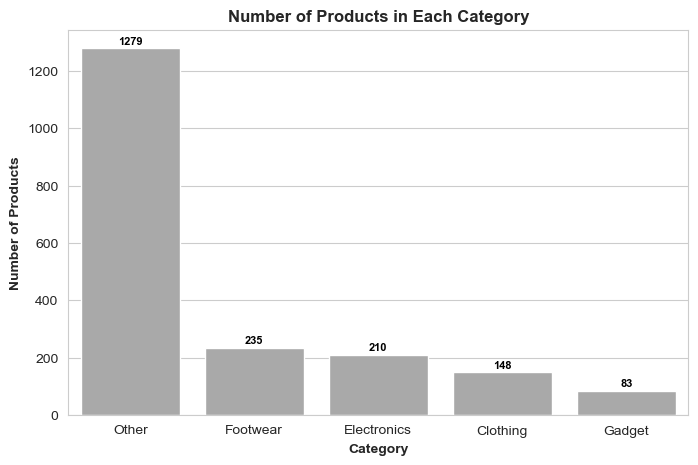

In [80]:
count=product_df3["Category"].value_counts(ascending=False)
order =count.index
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
ax=sns.countplot(data=product_df3, x="Category", order=order,color="darkgray")
for p in ax.patches:
 ax.annotate(f'{int(p.get_height())}',
 (p.get_x() + p.get_width() / 2., p.get_height()),
 ha="center",
 va="baseline",
 fontsize=8,
 fontweight="bold",
 color="black",
 xytext=(0, 3),
 textcoords="offset points")
plt.title("Number of Products in Each Category",fontweight="bold")
plt.xlabel("Category",fontweight="bold")
plt.ylabel("Number of Products",fontweight="bold")
plt.show()


#### b. average price

In [83]:
product_df3["Price Drop"] =product_df3["Initial_price"] -product_df3["Current_price"]
avg_price =product_df3.groupby("Category")[["Current_price","Initial_price","Price Drop"]].mean()
display(avg_price)


,Current_price,Initial_price,Price Drop
Category,,,
Clothing,2.497965e+06,1.879142e+06,-6.358098e+05
Electronics,3.635031e+04,5.301873e+06,5.265523e+06
Footwear,1.622646e+06,2.399669e+06,7.124427e+05
Gadget,6.996627e+03,1.060654e+04,3.316127e+03
Other,1.376062e+06,2.139844e+06,6.850157e+05


In [84]:
product_df3

,Name,Current_price,Initial_price,Discount,Stars,Category,Price Drop
0,NIVEA UV Face Shine Control Cream SPF 50 - 50ml,699.0,1300.0,46.0,4.3 out of 5,Other,601.0
1,NIVEA Nourishing Cocoa Body Lotion With Cocoa ...,699.0,1280.0,45.0,4.6 out of 5,Other,581.0
2,Fashion 6Pcs Soft Cotton Checked Men's Boxers ...,501.0,618.0,19.0,3.6 out of 5,Clothing,117.0
3,"Vitron HTC4388FS - 43"" Smart Android Frameles...",18999.0,28599.0,34.0,3.9 out of 5,Electronics,9600.0
4,Garnier Vitamin C Booster Serum 30ml Twin Pack,1750.0,3500.0,50.0,4.5 out of 5,Other,1750.0
...,...,...,...,...,...,...,...
1955,Hifinit Movie LED TV 1080P 6000 Lumen MINI Pro...,10147.0,19555.0,48.0,4.8 out of 5,Electronics,9408.0
1956,All In 1 Vegetable Safe Mandoline Slicer Cutte...,1424.0,2500.0,43.0,,Other,1076.0
1957,Tanqueray Rangpur Distilled Gin - 700ml,2599.0,3000.0,13.0,5 out of 5,Other,401.0
1958,Vacuum Red Wine Bottle Cap Stopper Silicone Se...,499.0,800.0,38.0,,Other,301.0


<Axes: >

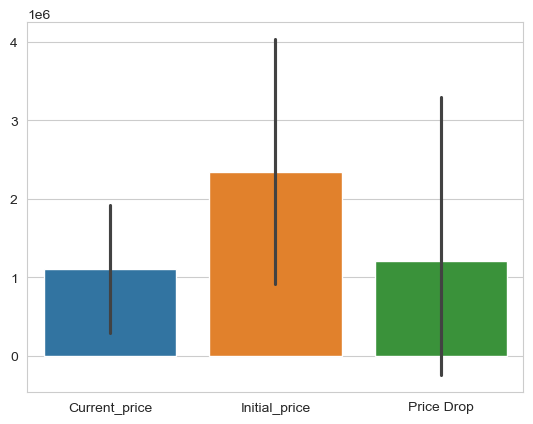

In [89]:
sns.barplot(avg_price)

In [ ]:
#### c. average discount per category

In [92]:
discount_analysis = product_df3.groupby("Category")["Discount"].mean().reset_index()
display(discount_analysis)


,Category,Discount
0,Clothing,32.891156
1,Electronics,36.023810
2,Footwear,41.553097
3,Gadget,36.265823
4,Other,33.292744


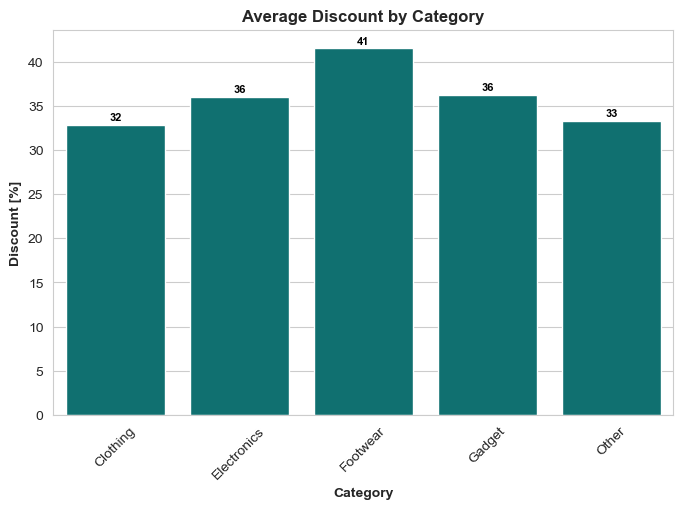

In [97]:
plt.figure(figsize=(8, 5))
ax=sns.barplot(data=discount_analysis, x="Category", y="Discount", color ="teal")
for p in ax.patches:
 ax.annotate(f'{int(p.get_height())}',
 (p.get_x() + p.get_width() / 2., p.get_height()),
 ha="center",
 va="baseline",
 fontsize=8,
 fontweight="bold",
 color="black",
 xytext=(0, 3),
 textcoords="offset points")
plt.title("Average Discount by Category",fontsize=12,fontweight="bold")
plt.ylabel("Discount [%]",fontweight="bold")
plt.xlabel("Category",fontweight="bold")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#### d. Ratings

In [100]:
def convert_stars_to_int(stars):
    if not stars or stars.strip() == "":  # Check for empty strings
        return np.nan  # Return NaN for missing values
    rating = float(stars.split(" ")[0])  # Convert to float first
    return int(round(rating))  # Round and convert to int

# Apply the function to the Stars column
product_df3['Stars'] = product_df3['Stars'].apply(convert_stars_to_int)

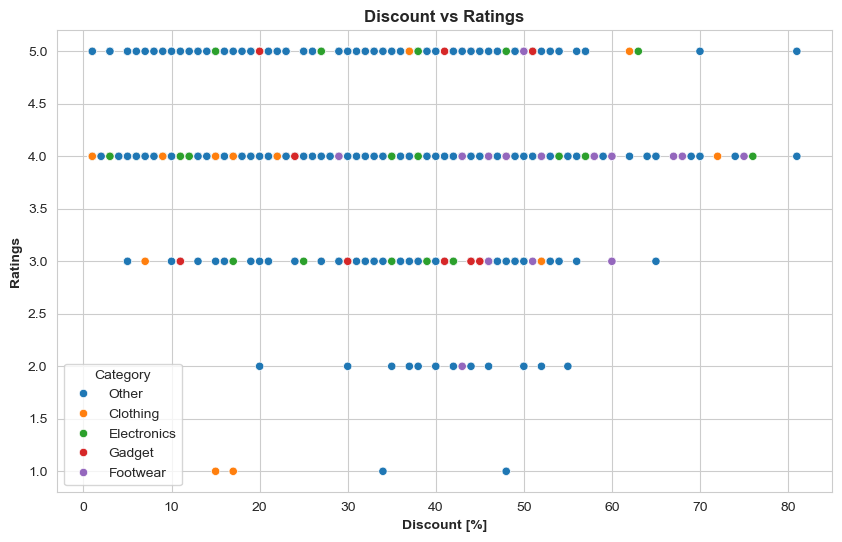

In [104]:
#scatter plot of discount vs ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_df3, x="Discount", y="Stars", hue="Category")
plt.title("Discount vs Ratings",fontweight="bold")
plt.xlabel("Discount [%]",fontweight="bold")
plt.ylabel("Ratings",fontweight="bold")
#plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

## Conclusion:

The following conclusions can be obtained from the analysis
- Footwears have higher discounts(41) , followed by Gadget(36), Electronics(36), Other categories(33) then Clothings(32).
- Products of ratings 4 star and above are the ones that are mostly discounted. Lowly rated products are mostly not discounted.
- Majority of discounted products are Other(1279), followed by footwear(235), electronics(210), clothing(148) and gadgets(83) respectively.
- Price drop of the products, averagely reduces by half of the initial price.